In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('Loan_Approval.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Wrangling

In [4]:
# Dealing with null value

data.isna().sum(), data.shape

(Loan_ID               0
 Gender               13
 Married               3
 Dependents           15
 Education             0
 Self_Employed        32
 ApplicantIncome       0
 CoapplicantIncome     0
 LoanAmount           22
 Loan_Amount_Term     14
 Credit_History       50
 Property_Area         0
 Loan_Status           0
 dtype: int64, (614, 13))

In [5]:
data.dropna(axis=0, inplace=True)
data.isna().sum(), data.shape

(Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64, (480, 13))

In [6]:
# Converting categorical data
data.drop('Loan_ID', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


In [7]:
property_area_lookup = dict(zip(data['Property_Area'].unique(), [0, 1, 2]))
dependecy_lookup = dict(zip(data['Dependents'].unique(), [0, 1, 2, 3, 4]))

data['Loan_Status'] = pd.get_dummies(data['Loan_Status'], drop_first=True)
data['Property_Area'].replace(property_area_lookup, inplace=True)
data['Gender'] = pd.get_dummies(data['Gender'], drop_first=True)
data['Dependents'].replace(dependecy_lookup, inplace=True)
data['Married'] = pd.get_dummies(data['Married'], drop_first=True)
data['Education'] = pd.get_dummies(data['Education'], drop_first=True)
data['Self_Employed'] = pd.get_dummies(data['Self_Employed'], drop_first=True)

In [8]:
data.info()
print(property_area_lookup)
print(dependecy_lookup)
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    uint8  
 1   Married            480 non-null    uint8  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    uint8  
 4   Self_Employed      480 non-null    uint8  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    int64  
 11  Loan_Status        480 non-null    uint8  
dtypes: float64(4), int64(3), uint8(5)
memory usage: 32.3 KB
{'Rural': 0, 'Urban': 1, 'Semiurban': 2}
{'1': 0, '0': 1, '2': 2, '3+': 3}


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,1,0,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,1


# Explanatory Data Analysis

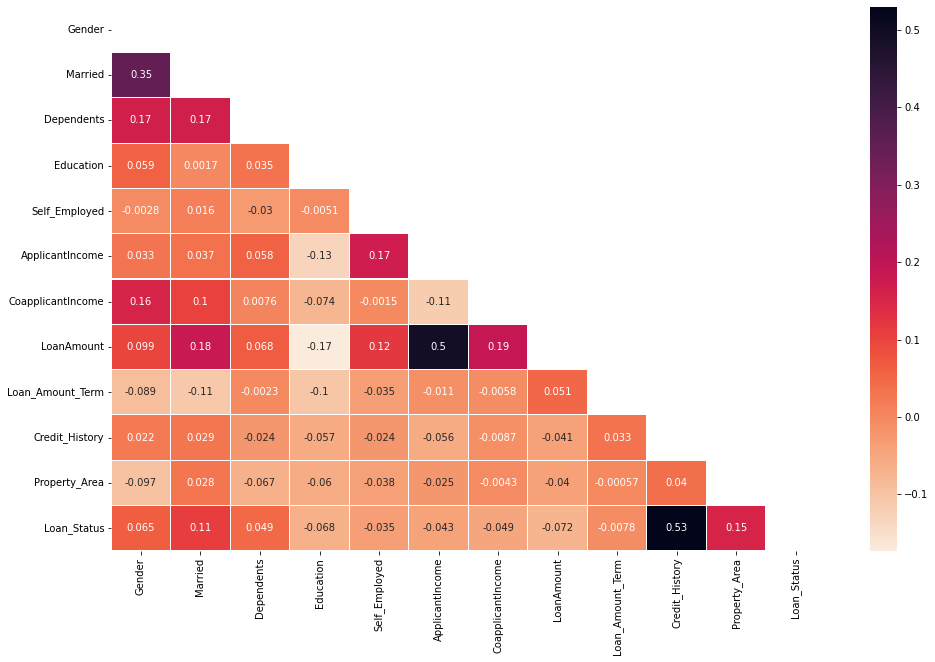

In [9]:
# Correlation Analysis With Heatmap

plt.figure(figsize=(16, 10))

# applying mask
mask = np.triu(np.ones_like(data.corr()))
 
# plotting a triangle correlation heatmap rocket_r, viridis
sns.heatmap(data.corr(), mask=mask, annot=True, cmap='rocket_r', linewidth=0.1)

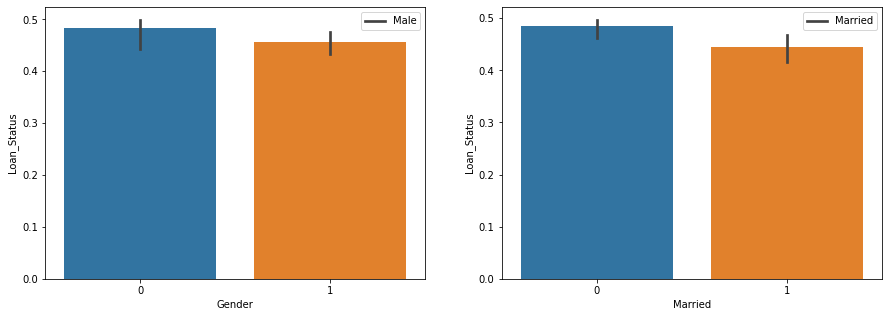

In [10]:
# Gender Loan Distribution

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.barplot(x='Gender', y='Loan_Status', data=data, estimator=np.std, ax=ax[0])
ax[0].legend(['Male'])

sns.barplot(x='Married', y='Loan_Status', data=data, estimator=np.std, ax=ax[1])
ax[1].legend(['Married'])

<Figure size 1080x576 with 0 Axes>

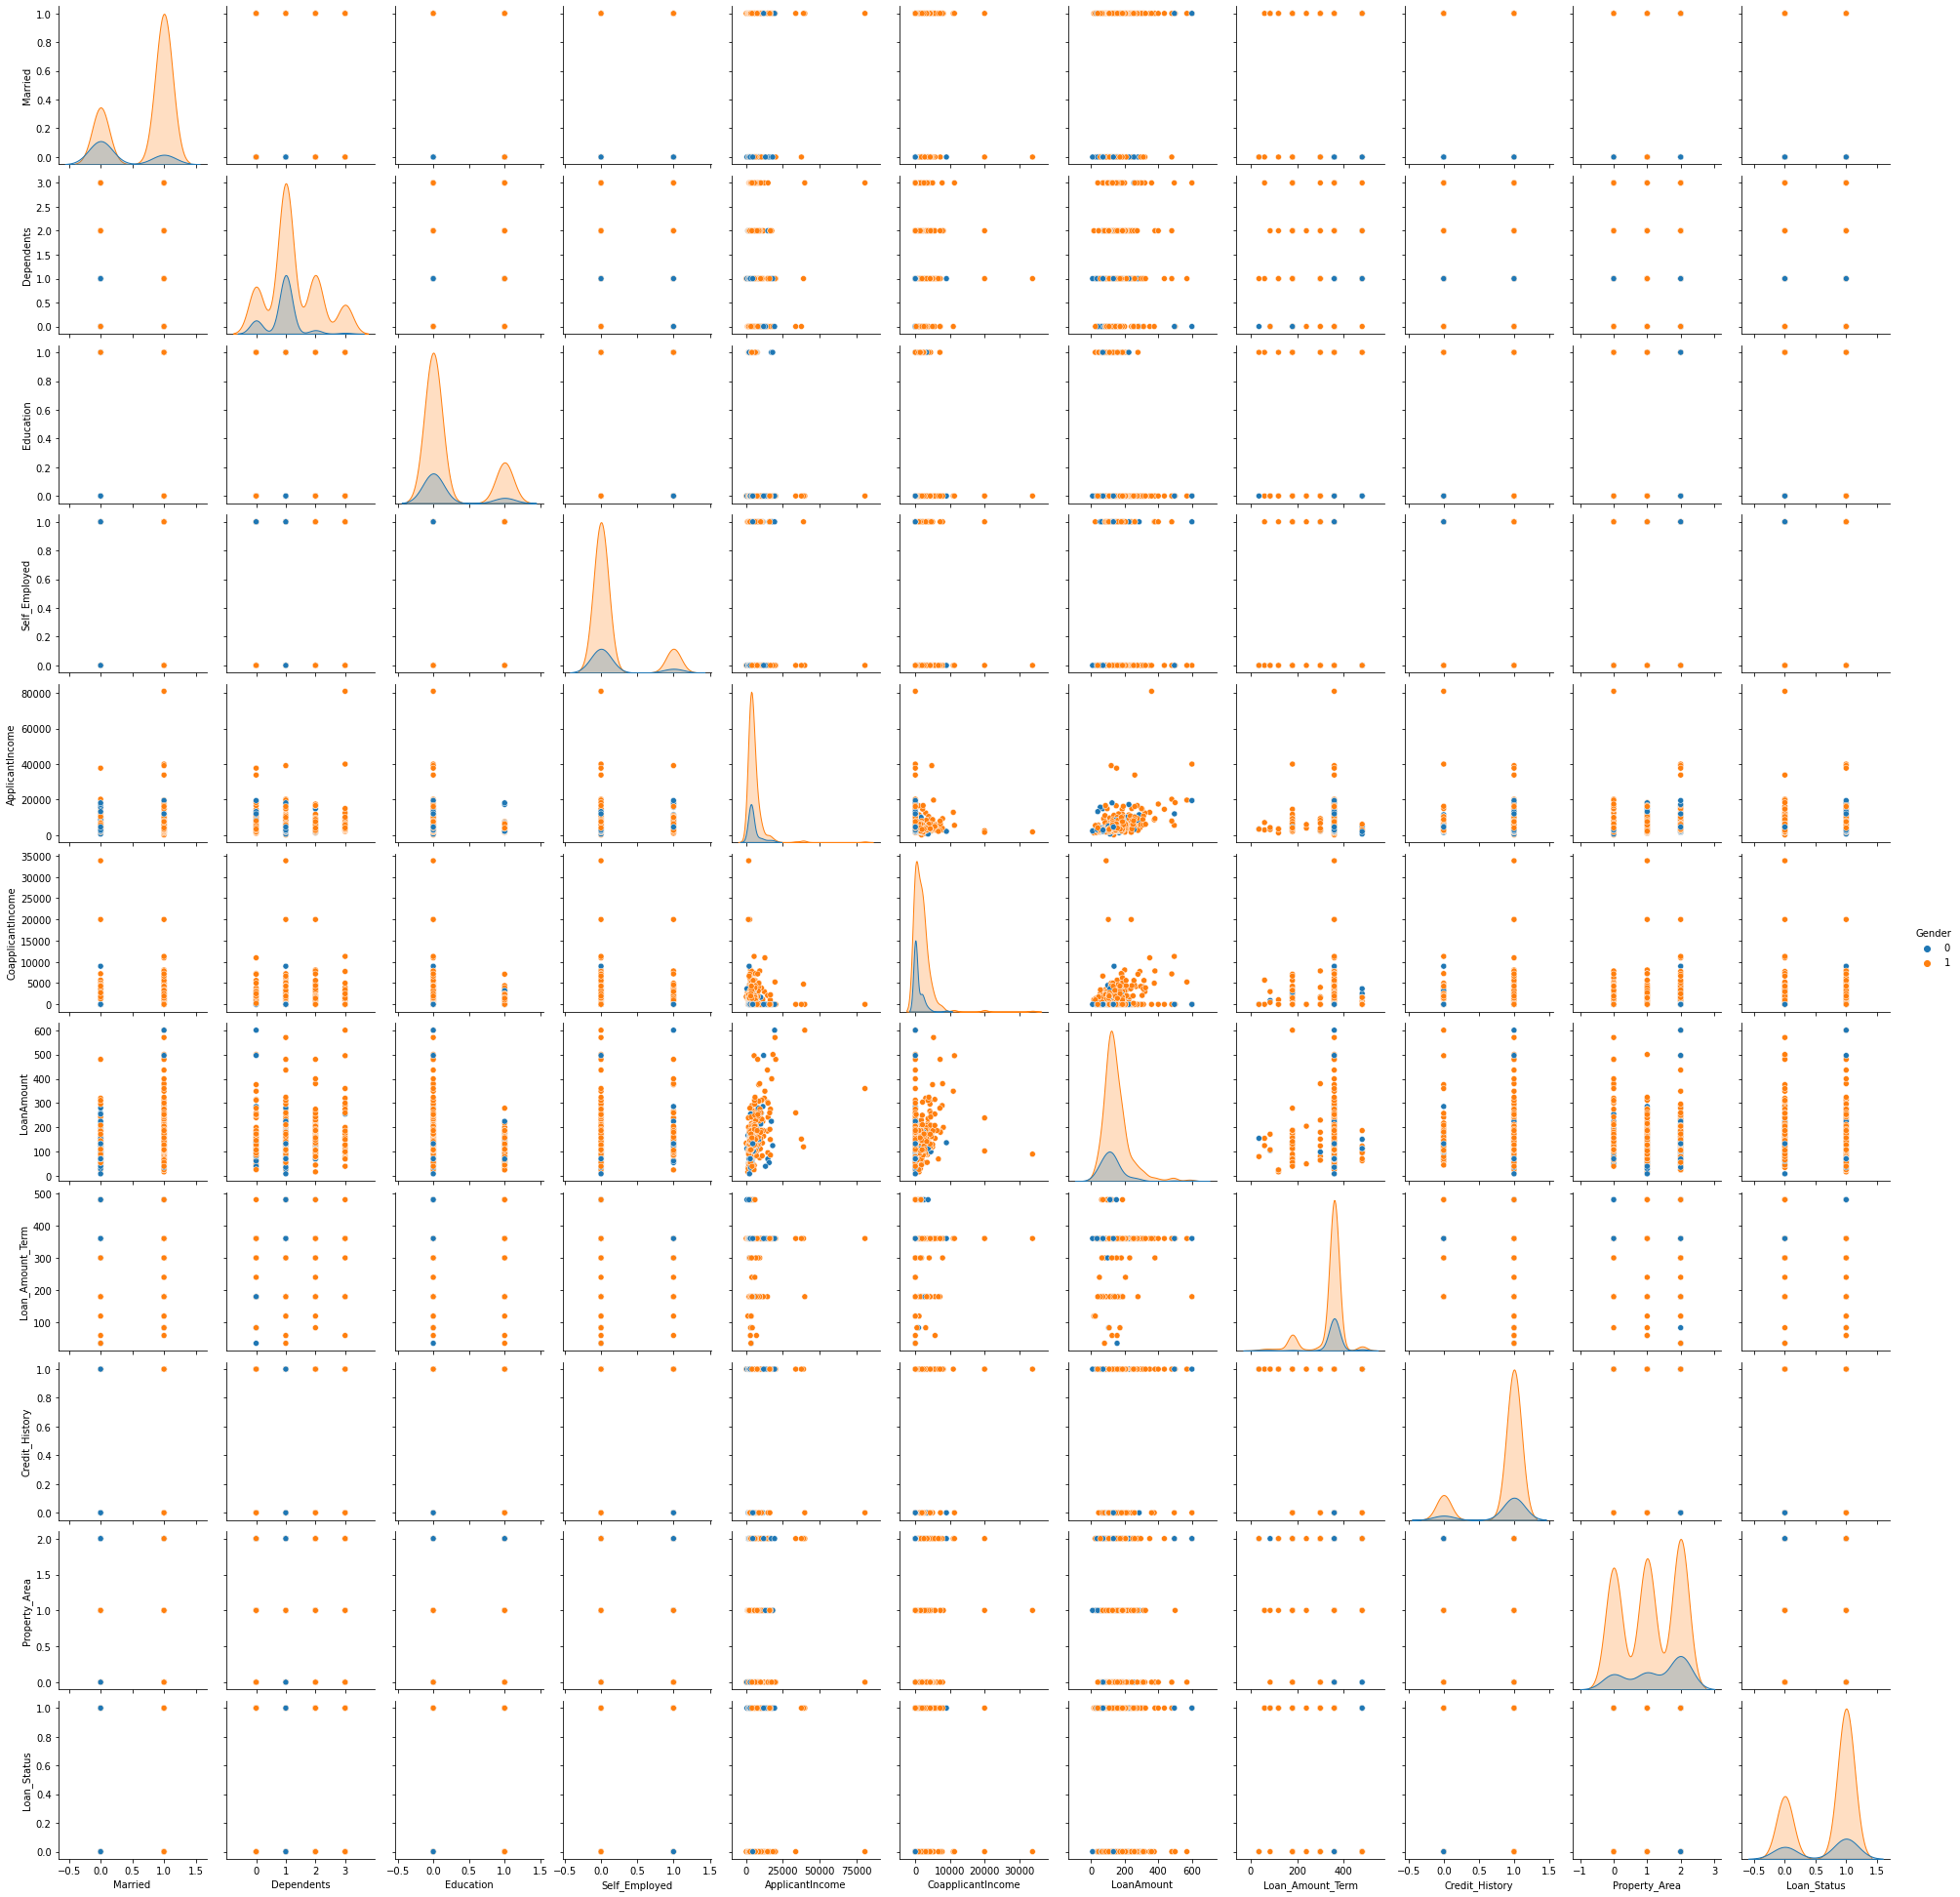

In [11]:
# 
plt.figure(figsize=(15, 8))
sns.pairplot(data, hue='Gender')

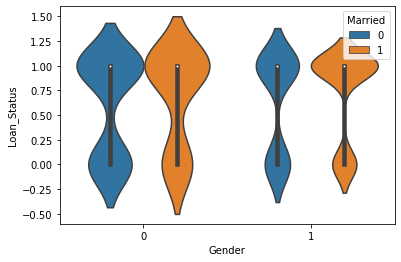

In [12]:
sns.violinplot(x='Gender', y='Loan_Status', data=data, hue='Married')

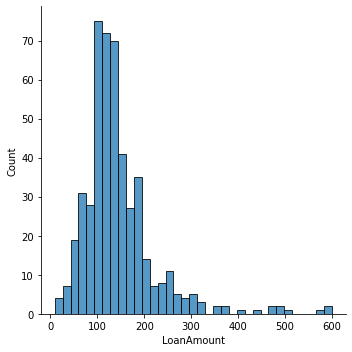

In [13]:
# Distplot Loan Amount

sns.displot(data['LoanAmount'], kde=False, bins=35)

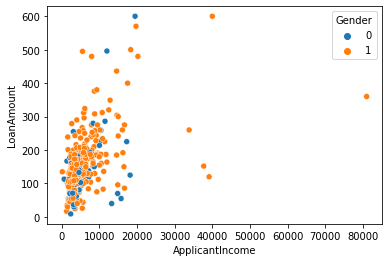

In [14]:
sns.scatterplot(x=data['ApplicantIncome'], y=data['LoanAmount'], hue=data['Gender'])

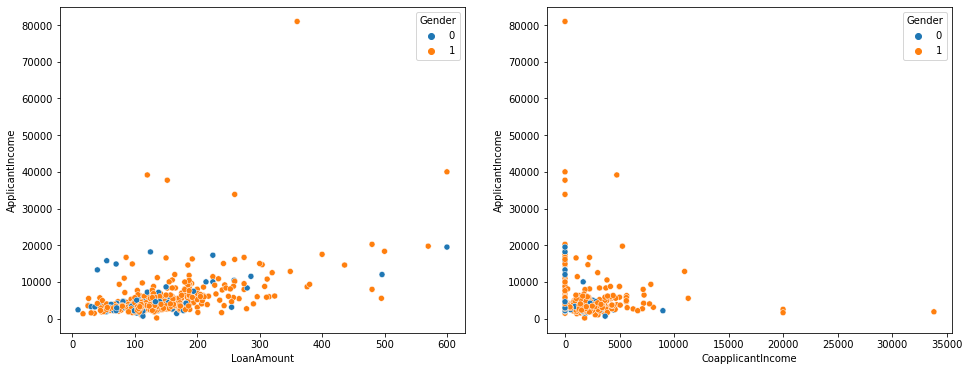

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.scatterplot(x=data['LoanAmount'], y=data['ApplicantIncome'], hue=data['Gender'], ax=ax[0])

sns.scatterplot(x=data['CoapplicantIncome'], y=data['ApplicantIncome'], hue=data['Gender'], ax=ax[1])

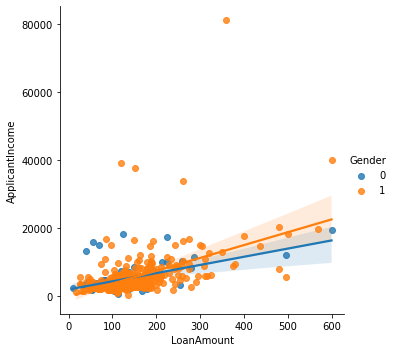

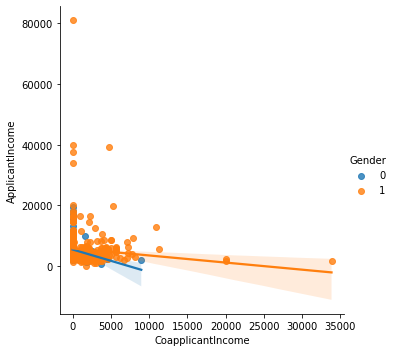

In [16]:
sns.lmplot(x='LoanAmount', y='ApplicantIncome',  data=data,  hue='Gender')

sns.lmplot(x='CoapplicantIncome', y='ApplicantIncome', data=data, hue='Gender')


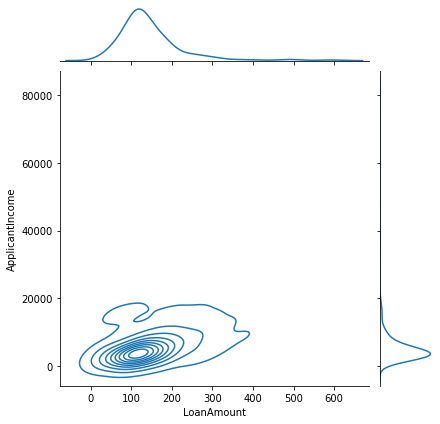

In [17]:
sns.jointplot(x='LoanAmount', y='ApplicantIncome', data=data, kind='kde')

# Design Model

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((384, 11), (384,))

In [33]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [28]:
def nneighbors():
    
    knn = KNeighborsClassifier(n_neighbors=13).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    
    print(f'Training Score: {train_score}, Test Score: {test_score}')
    
    return {
        'model': knn,
        'y_pred': y_pred,
        'train_score': train_score,
        'test_score': test_score
    }
    
nneighbors()

Training Score: 0.7161458333333334, Test Score: 0.7083333333333334


{'model': KNeighborsClassifier(n_neighbors=13),
 'y_pred': array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0], dtype=uint8),
 'train_score': 0.7161458333333334,
 'test_score': 0.7083333333333334}

In [29]:
def naive():
    
    clf = GaussianNB().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    print(f'Training Score: {train_score}, Test Score: {test_score}')
    
    return {
        'model': clf,
        'y_pred': y_pred,
        'train_score': train_score,
        'test_score': test_score
    }
    
naive()

Training Score: 0.796875, Test Score: 0.8229166666666666


{'model': GaussianNB(),
 'y_pred': array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8),
 'train_score': 0.796875,
 'test_score': 0.8229166666666666}

In [30]:
def svm():
    
    svm = SVC(kernel='linear').fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    train_score = svm.score(X_train, y_train)
    test_score = svm.score(X_test, y_test)
    
    print(f'Training Score: {train_score}, Test Score: {test_score}')
    
    return {
        'model': svm,
        'y_pred': y_pred,
        'train_score': train_score,
        'test_score': test_score
    }
    
svm()

Training Score: 0.7890625, Test Score: 0.8020833333333334


{'model': SVC(kernel='linear'),
 'y_pred': array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8),
 'train_score': 0.7890625,
 'test_score': 0.8020833333333334}

In [34]:
def logistic():
    
    clf = LogisticRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    print(f'Training Score: {train_score}, Test Score: {test_score}')
    
    return {
        'model': clf,
        'y_pred': y_pred,
        'train_score': train_score,
        'test_score': test_score
    }
    
logistic()

Training Score: 0.8177083333333334, Test Score: 0.8125


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'model': LogisticRegression(),
 'y_pred': array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8),
 'train_score': 0.8177083333333334,
 'test_score': 0.8125}

In [35]:
def sgd():
    
    clf =  SGDClassifier(max_iter=1000, tol=1e-3).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    print(f'Training Score: {train_score}, Test Score: {test_score}')
    
    return {
        'model': clf,
        'y_pred': y_pred,
        'train_score': train_score,
        'test_score': test_score
    }
    
sgd()

Training Score: 0.65625, Test Score: 0.7083333333333334


{'model': SGDClassifier(),
 'y_pred': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1], dtype=uint8),
 'train_score': 0.65625,
 'test_score': 0.7083333333333334}

In [36]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,1,0,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,1


In [37]:
from sklearn.metrics import classification_report, confusion_matrix

In [39]:
clf = logistic()
y_pred = clf['y_pred']
print(classification_report(y_test, y_pred))

Training Score: 0.8177083333333334, Test Score: 0.8125
              precision    recall  f1-score   support

           0       0.92      0.39      0.55        28
           1       0.80      0.99      0.88        68

    accuracy                           0.81        96
   macro avg       0.86      0.69      0.72        96
weighted avg       0.83      0.81      0.78        96



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


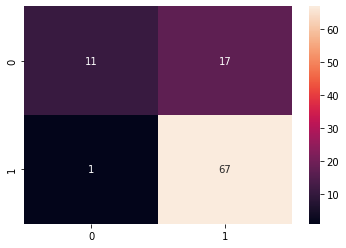

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)